In [1]:
import os
import zipfile
import pandas as pd

# Path to the zip file
zip_path = 'C:/Users/carsk/OneDrive - KU Leuven/Thesis/Revised_RESULTS/Baseflow/ANALYSIS'

# Find all the csv files
csv_files = []
for root, dirs, files in os.walk(zip_path):
    for file in files:
        if file == '1H_resampl.csv':
            csv_files.append(os.path.join(root, file))

# Load each csv file into a dataframe
dfs = {}
for csv_file in csv_files:
    basin_name = os.path.basename(os.path.dirname(csv_file))
    df = pd.read_csv(csv_file)
    dfs[basin_name] = df

# Show the first few rows of each dataframe
dfs
df

,date,U05,Baseflow,U05_without_baseflow,WOL5
0,2016-01-01 00:00:00,612.333333,696.250000,0.000000,0.000000
1,2016-01-01 01:00:00,1134.250000,610.583333,0.541083,0.933974
2,2016-01-01 02:00:00,2984.166667,536.833333,2.447333,0.051297
3,2016-01-01 03:00:00,1145.666667,522.583333,0.623083,0.000000
4,2016-01-01 04:00:00,721.750000,507.666667,0.214083,0.000000
...,...,...,...,...,...
26299,2018-12-31 19:00:00,731.500000,708.000000,0.027750,NaN
26300,2018-12-31 20:00:00,635.333333,747.333333,0.000000,NaN
26301,2018-12-31 21:00:00,573.500000,755.750000,0.000000,NaN
26302,2018-12-31 22:00:00,510.500000,703.833333,0.000000,NaN


In [2]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt

# Dictionary to store the results
results = {}

# Calculate metrics for each basin
for basin, df in dfs.items():
    # Remove rows with missing values
    df = df.dropna()

    # Observed data
    observed = df.iloc[:, -2]

    # Modeled data
    modeled = df.iloc[:, -1]

    # Calculate metrics
    mae = mean_absolute_error(observed, modeled)
    mse = mean_squared_error(observed, modeled)
    rmse = sqrt(mse)
    r2 = r2_score(observed, modeled)

    # Store results
    results[basin] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

# Convert results to a dataframe
results_df = pd.DataFrame(results).transpose()
results_df


,MAE,MSE,RMSE,R2
BNV4-U11,0.017630,0.030969,0.175981,-27.312294
BNV8-U19,0.182964,8.413423,2.900590,-13.028625
MAL1-C11,0.028765,0.091931,0.303202,-16.552745
MOL5-U17,0.151408,0.705612,0.840007,-0.271223
WOL4-C01,0.031163,0.075521,0.274811,-1.974367
WOL5-U05,0.168007,0.846334,0.919964,0.303118


In [10]:
observed.head()

0    0.000000
1    0.541083
2    2.447333
3    0.623083
4    0.214083
Name: U05_without_baseflow, dtype: float64

In [11]:
modeled.head()

0    0.000000
1    0.933974
2    0.051297
3    0.000000
4    0.000000
Name: WOL5, dtype: float64

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
# Check shape of the observed and modeled data for each basin
for basin, df in dfs.items():
    # Remove rows with missing values
    df = df.dropna()
    
    # Observed data
    observed = df.iloc[:, -2]
    
    # Modeled data
    modeled = df.iloc[:, -1]
    
    # Print shapes
    print(f"Basin: {basin}")
    print(f"Shape of observed data: {observed.shape}")
    print(f"Shape of modeled data: {modeled.shape}")
    
    # Calculate and print Spearman correlation
    correlation, p_value = spearmanr(observed, modeled)
    print(f"Spearman correlation: {correlation}\n")


Basin: BNV4-U11
Shape of observed data: (26270,)
Shape of modeled data: (26270,)
Spearman correlation: 0.28638793542470387

Basin: BNV8-U19
Shape of observed data: (21811,)
Shape of modeled data: (21811,)
Spearman correlation: 0.40513181911190244

Basin: MAL1-C11
Shape of observed data: (21665,)
Shape of modeled data: (21665,)
Spearman correlation: 0.43635820903717637

Basin: MOL5-U17
Shape of observed data: (26225,)
Shape of modeled data: (26225,)
Spearman correlation: 0.37956782813468487

Basin: WOL4-C01
Shape of observed data: (26278,)
Shape of modeled data: (26278,)
Spearman correlation: 0.39317064460272216

Basin: WOL5-U05
Shape of observed data: (26227,)
Shape of modeled data: (26227,)
Spearman correlation: 0.48050957823645



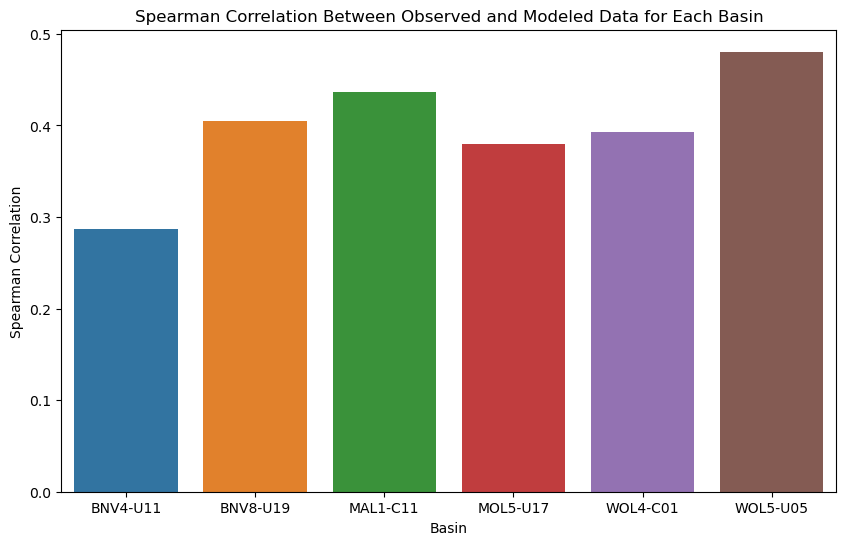

In [14]:
# Prepare a figure to contain the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for the bar plot
basins = list(dfs.keys())
correlations = [spearmanr(df.dropna().iloc[:, -2], df.dropna().iloc[:, -1])[0] for df in dfs.values()]

# Create a bar plot
sns.barplot(x=basins, y=correlations, ax=ax)

# Set the title and labels
ax.set_title('Spearman Correlation Between Observed and Modeled Data for Each Basin')
ax.set_xlabel('Basin')
ax.set_ylabel('Spearman Correlation')

# Show the plot
plt.show()


In [15]:
# Check shape of the observed and modeled data for each basin
for basin, df in dfs.items():
    # Remove rows with missing values
    df = df.dropna()
    
    # Observed data
    observed = df.iloc[:, -2]
    
    # Modeled data
    modeled = df.iloc[:, -1]
    
    # Print shapes
    print(f"Basin: {basin}")
    print(f"Shape of observed data: {observed.shape}")
    print(f"Shape of modeled data: {modeled.shape}")
    
    # Calculate and print Pearson correlation
    correlation, p_value = observed.corr(modeled, method='pearson'), modeled.corr(observed, method='pearson')
    print(f"Pearson correlation: {correlation}\n")


Basin: BNV4-U11
Shape of observed data: (26270,)
Shape of modeled data: (26270,)
Pearson correlation: 0.5857412728786098

Basin: BNV8-U19
Shape of observed data: (21811,)
Shape of modeled data: (21811,)
Pearson correlation: 0.1303393466597598

Basin: MAL1-C11
Shape of observed data: (21665,)
Shape of modeled data: (21665,)
Pearson correlation: 0.7662176808195463

Basin: MOL5-U17
Shape of observed data: (26225,)
Shape of modeled data: (26225,)
Pearson correlation: 0.43873432543155066

Basin: WOL4-C01
Shape of observed data: (26278,)
Shape of modeled data: (26278,)
Pearson correlation: 0.6829496274922132

Basin: WOL5-U05
Shape of observed data: (26227,)
Shape of modeled data: (26227,)
Pearson correlation: 0.573833797596476



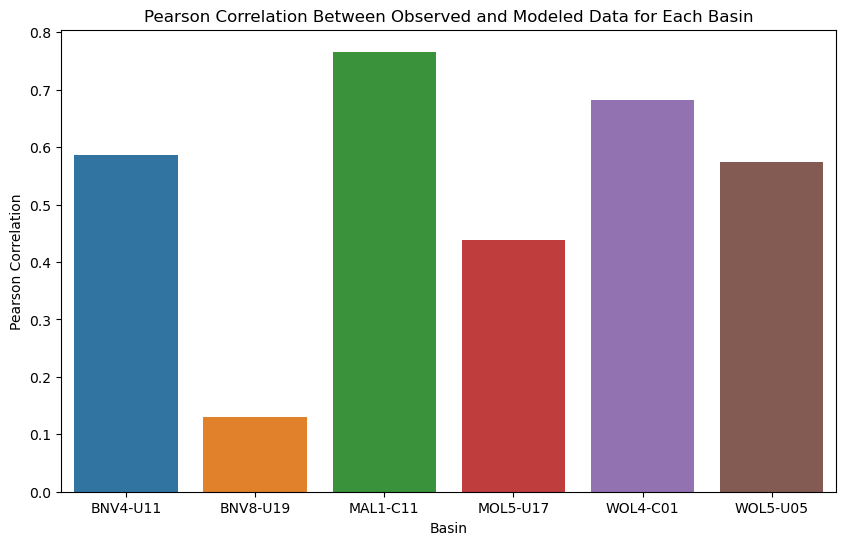

In [16]:
# Prepare a figure to contain the bar plot
fig, ax = plt.subplots(figsize=(10, 6))

# Prepare data for the bar plot
correlations = [df.dropna().iloc[:, -2].corr(df.dropna().iloc[:, -1], method='pearson') for df in dfs.values()]

# Create a bar plot
sns.barplot(x=basins, y=correlations, ax=ax)

# Set the title and labels
ax.set_title('Pearson Correlation Between Observed and Modeled Data for Each Basin')
ax.set_xlabel('Basin')
ax.set_ylabel('Pearson Correlation')

# Show the plot
plt.show()


In [5]:
def nash_sutcliffe_efficiency(observed, modeled):
    """
    Calculate Nash Sutcliffe Efficiency.

    :param observed: Observed data
    :param modeled: Modeled data
    :return: Nash Sutcliffe Efficiency
    """
    return 1 - (sum((observed - modeled) ** 2) / sum((observed - observed.mean()) ** 2))

# Calculate Nash Sutcliffe Efficiency for each basin
for basin, df in dfs.items():
    # Remove rows with missing values
    df = df.dropna()
    
    # Observed data
    observed = df.iloc[:, -2]
    
    # Modeled data
    modeled = df.iloc[:, -1]
    
    # Calculate Nash Sutcliffe Efficiency
    nse = nash_sutcliffe_efficiency(observed, modeled)
    
    # Add NSE to the results
    results[basin]['NSE'] = nse

# Convert results to a dataframe
results_df = pd.DataFrame(results).transpose()

# Save the dataframe to a csv file
results_df.to_csv('model_performance_metrics.csv')

results_df

,MAE,MSE,RMSE,R2,NSE
BNV4-U11,0.017630,0.030969,0.175981,-27.312294,-27.312294
BNV8-U19,0.182964,8.413423,2.900590,-13.028625,-13.028625
MAL1-C11,0.028765,0.091931,0.303202,-16.552745,-16.552745
MOL5-U17,0.151408,0.705612,0.840007,-0.271223,-0.271223
WOL4-C01,0.031163,0.075521,0.274811,-1.974367,-1.974367
WOL5-U05,0.168007,0.846334,0.919964,0.303118,0.303118


In [18]:
from scipy.stats import pearsonr

# Calculate Pearson correlation and p-value for each basin
pearson_results = {}
spearman_results = {}

for basin, df in dfs.items():
    # Remove rows with missing values
    df = df.dropna()
    
    # Observed data
    observed = df.iloc[:, -2]
    
    # Modeled data
    modeled = df.iloc[:, -1]
    
    # Calculate Pearson correlation and p-value
    pearson_corr, pearson_pvalue = pearsonr(observed, modeled)
    pearson_results[basin] = {'Pearson Correlation': pearson_corr, 'Pearson P-Value': pearson_pvalue}

    # Calculate Spearman correlation and p-value
    spearman_corr, spearman_pvalue = spearmanr(observed, modeled)
    spearman_results[basin] = {'Spearman Correlation': spearman_corr, 'Spearman P-Value': spearman_pvalue}

# Convert results to dataframes
pearson_df = pd.DataFrame(pearson_results).transpose()
spearman_df = pd.DataFrame(spearman_results).transpose()

# Save the dataframes to csv files
pearson_df.to_csv('pearson_correlation_pvalues.csv')
spearman_df.to_csv('spearman_correlation_pvalues.csv')

pearson_df, spearman_df

(          Pearson Correlation  Pearson P-Value
 BNV4-U11             0.585741     0.000000e+00
 BNV8-U19             0.130339     2.967429e-83
 MAL1-C11             0.766218     0.000000e+00
 MOL5-U17             0.438734     0.000000e+00
 WOL4-C01             0.682950     0.000000e+00
 WOL5-U05             0.573834     0.000000e+00,
           Spearman Correlation  Spearman P-Value
 BNV4-U11              0.286388               0.0
 BNV8-U19              0.405132               0.0
 MAL1-C11              0.436358               0.0
 MOL5-U17              0.379568               0.0
 WOL4-C01              0.393171               0.0
 WOL5-U05              0.480510               0.0)

In [21]:
# Calculate the correlation matrix for each basin
correlation_matrices = {basin: df.corr() for basin, df in dfs.items()}

# Save each correlation matrix to a CSV file
for basin, correlation_matrix in correlation_matrices.items():
    correlation_matrix.to_csv(f'C:/Users/carsk/OneDrive - KU Leuven/Thesis/Revised_RESULTS/Baseflow/ANALYSIS/{basin}_correlation_matrix.csv')

correlation_matrices

ValueError: could not convert string to float: '2016-01-01 00:00:00'